In [12]:
import numpy as np

import BinaryReader
import TFRecordsHandler
import matplotlib.pyplot as plt
import tensorflow as tf

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num GPUs Available:  1


2022-03-01 18:03:05.426483: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 18:03:05.449390: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 18:03:05.449497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [11]:
dataset = TFRecordsHandler.get_dataset_small(["/mnt/NewHDD/tfrecords/file_0.tfrecords", "/mnt/NewHDD/tfrecords/file_205.tfrecords"])

In [157]:
import BinaryReader
import InputList

br = BinaryReader.BinaryReader()
gen = br.instance_from_binaries_generator(InputList.healthy_training_files[0:1])
i = 0
for elem in gen:
    if i==0:
        border_elem = elem
        mean_border_ascan = np.mean(elem[0].reshape((1536, 102*102)), axis=1)
        var_border_ascan = np.var(elem[0].reshape((1536, 102*102)), axis=1)
    i += 1
    if i == 191:
        retina_elem1 = elem
        mean_retina_ascan1 = np.mean(elem[0].reshape((1536, 102*102)), axis=1)
        var_retina_ascan1 = np.var(elem[0].reshape((1536, 102*102)), axis=1)
    if i == 204:
        retina_elem2 = elem
        mean_retina_ascan2 = np.mean(elem[0].reshape((1536, 102*102)), axis=1)
        var_retina_ascan2 = np.var(elem[0].reshape((1536, 102*102)), axis=1)
        break

In [158]:
retina1 = retina_elem2[0]
retina2 = retina_elem1[0]
border1 = border_elem[0]
all_elem = [border1, retina1, retina2]

In [159]:
new_all = []
for elem in all_elem:
    new_all.append(elem.astype("int64") - 32743)

In [160]:
np.mean(new_all[0])

0.38034049404075354

In [161]:
newer_all = []
for elem in new_all:
    newer_all.append(np.abs(elem))

In [164]:
newer_all[0].shape

(1536, 102, 102, 1)

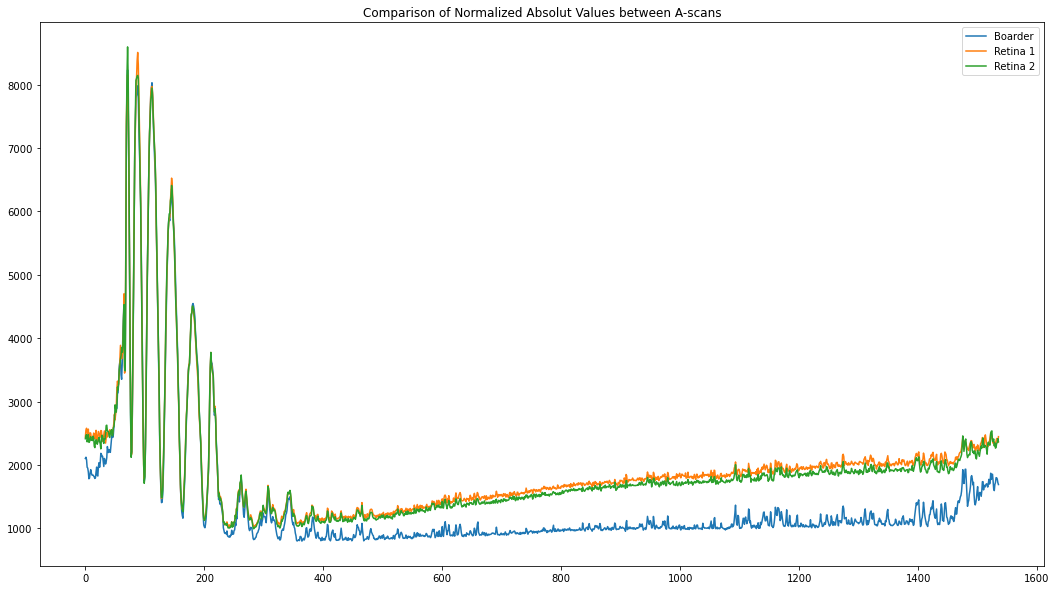

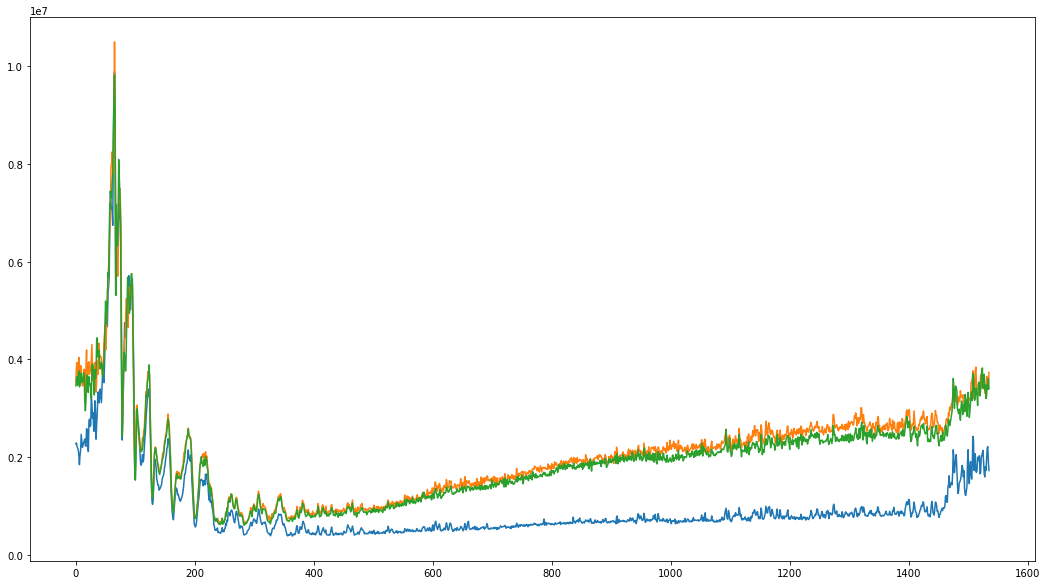

In [168]:
fig = plt.figure(figsize=(18,10))
plt.title("Comparison of Normalized Absolut Values between A-scans")
for elem in newer_all:
    plt.plot(np.mean(elem.reshape((1536, 102*102)), axis=1))
plt.legend(["Boarder", "Retina 1", "Retina 2"])
plt.savefig("normalize_absolut.png")
fig = plt.figure(figsize=(18,10))
for elem in newer_all:
    plt.plot(np.var(elem.reshape((1536, 102*102)), axis=1))

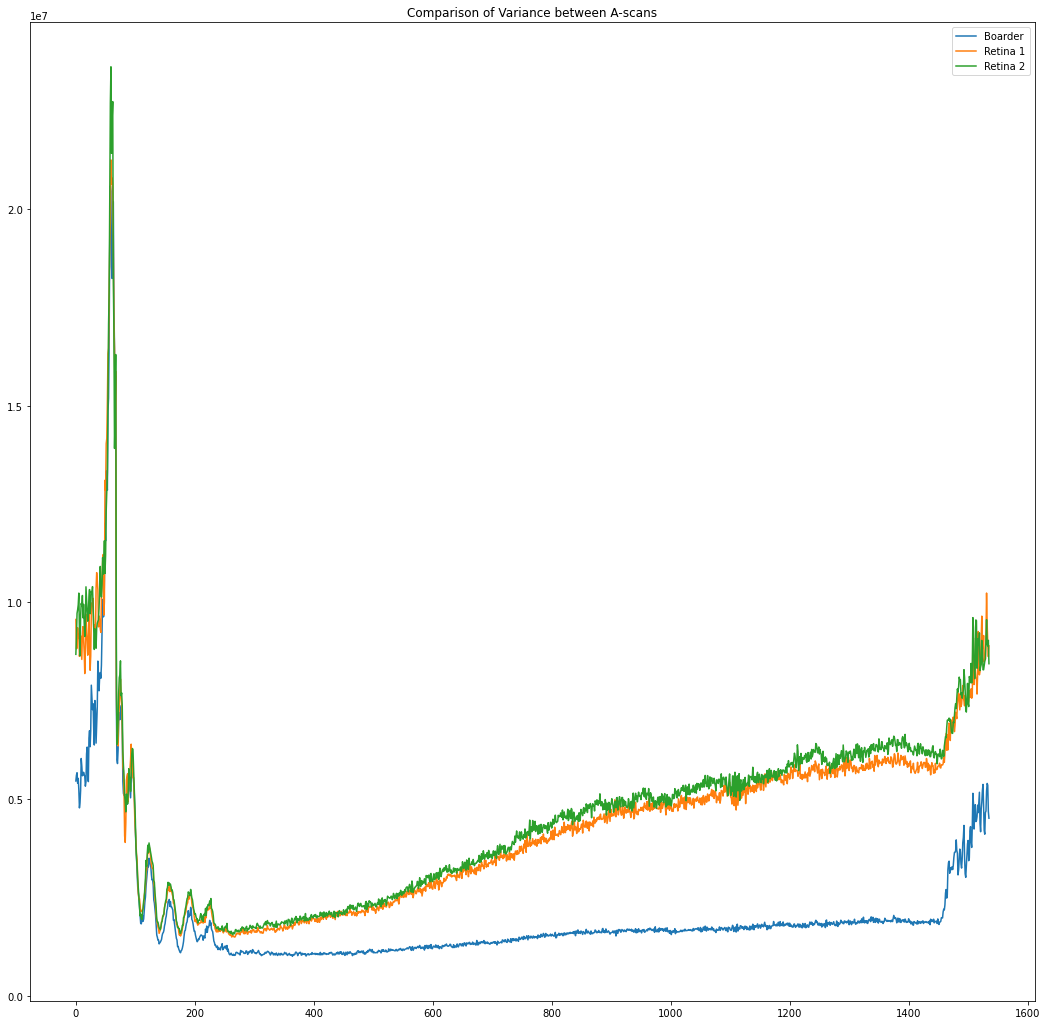

In [121]:
fig = plt.figure(figsize=(18,18))
plt.plot(var_border_ascan)
plt.plot(var_retina_ascan1)
plt.plot(var_retina_ascan2)
plt.legend(["Boarder", "Retina 1", "Retina 2"])
plt.title("Comparison of Variance between A-scans")
plt.savefig("variance_plot.png")

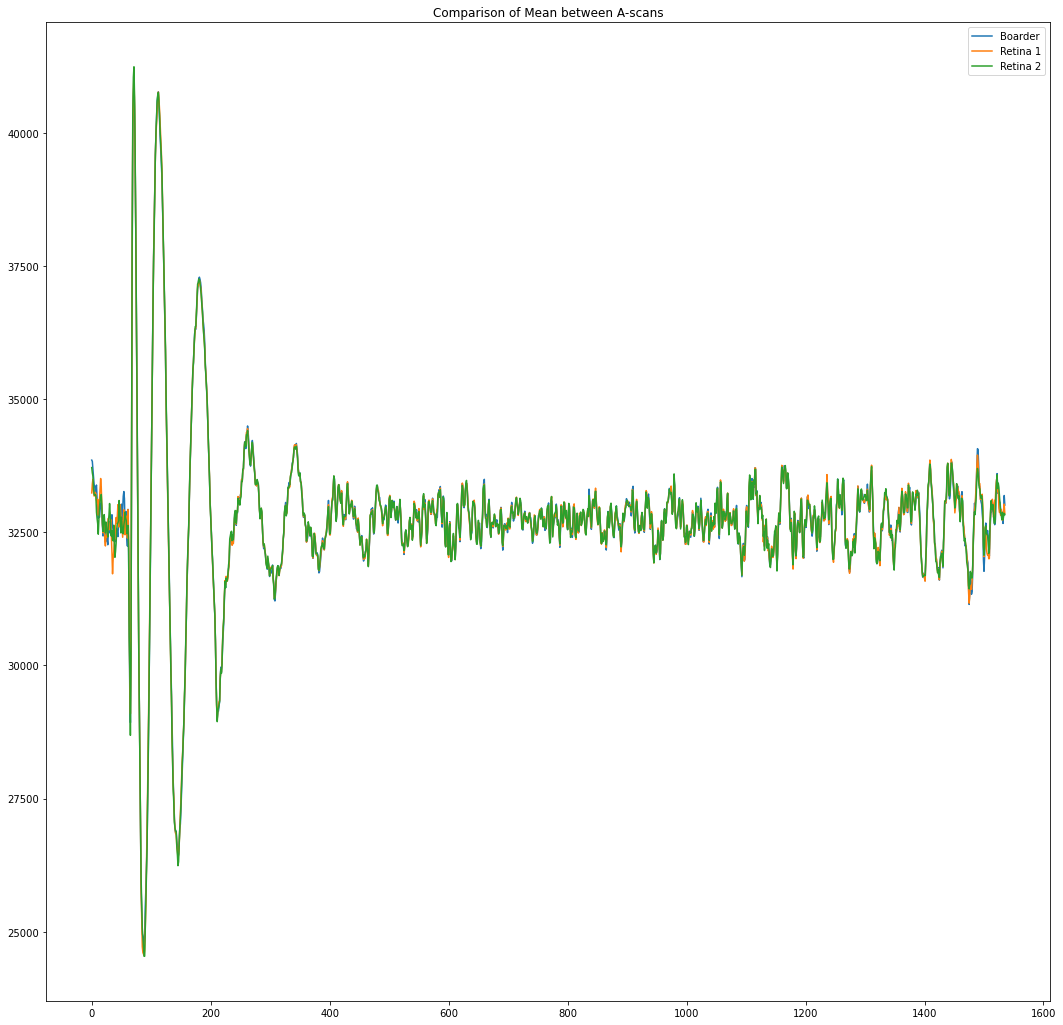

In [122]:
# TODO: Move to Utils file?
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,18))
plt.plot(mean_border_ascan)
plt.plot(mean_retina_ascan1)
plt.plot(mean_retina_ascan2)
plt.legend(["Boarder", "Retina 1", "Retina 2"])
plt.title("Comparison of Mean between A-scans")
plt.savefig("mean_plot.png")

In [6]:
import tensorflow.keras as k

inp = k.layers.Input(shape=(1536, 1), dtype="float32")

#flatten and fully connected layer
out, weights = k.layers.AdditiveAttention(name="a")([inp, inp], return_attention_scores=True)


model = k.Model(inputs=inp, outputs=out)
model.compile(optimizer=k.optimizers.Adam(lr=1e-4), loss=k.losses.BinaryCrossentropy(from_logits=True))
model.summary()
